In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno


df=pd.read_csv("https://raw.githubusercontent.com/mpaydar/Data-Analysis-Personal-Projects/main/Data%20Cleaning/Project1-Airbnb/Airbnb_Open_Data.csv")
df.head(5)

C:\Users\m21ne\AppData\Local\Temp\ipykernel_1544\1430338229.py:8: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("https://raw.githubusercontent.com/mpaydar/Data-Analysis-Personal-Projects/main/Data%20Cleaning/Project1-Airbnb/Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# EDA Section

## Number of rows and columns

In [2]:
rows,columns=df.shape
print('Rows: ',rows)
print('Columns: ',columns)

Rows:  102599
Columns:  26


## Checking Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

**Data Type Watch List**:

- Construction year: float65 to int64
- service fee :object to int64
- price: object to int64
- minimum nights: float64 to int64
- number of reviews: float64 to int64
- reviews per month: float64 to int64
- review rate number: float64 to int64
- availability 365: float64 to int64
- last review: object to datetime
    

There are 9 columns with float data type,2 columns are int64 and 15 columns string/objects. While inspecting the data types, it is evidenced that price and services fee data types happen to be object data type. The more appropriate data type is float, since both of these attributes might contain decimal values.It is a good idea to look at these specific unique values. As it was inspected in the dataframe , the syntax of price include dollar sign which is non-numerical makes the analyze difficult so it is to our advantagous to get rid off the $-sign . The same argument is valid for 'service fee' column.

## Missing Value Matrix

<AxesSubplot:>

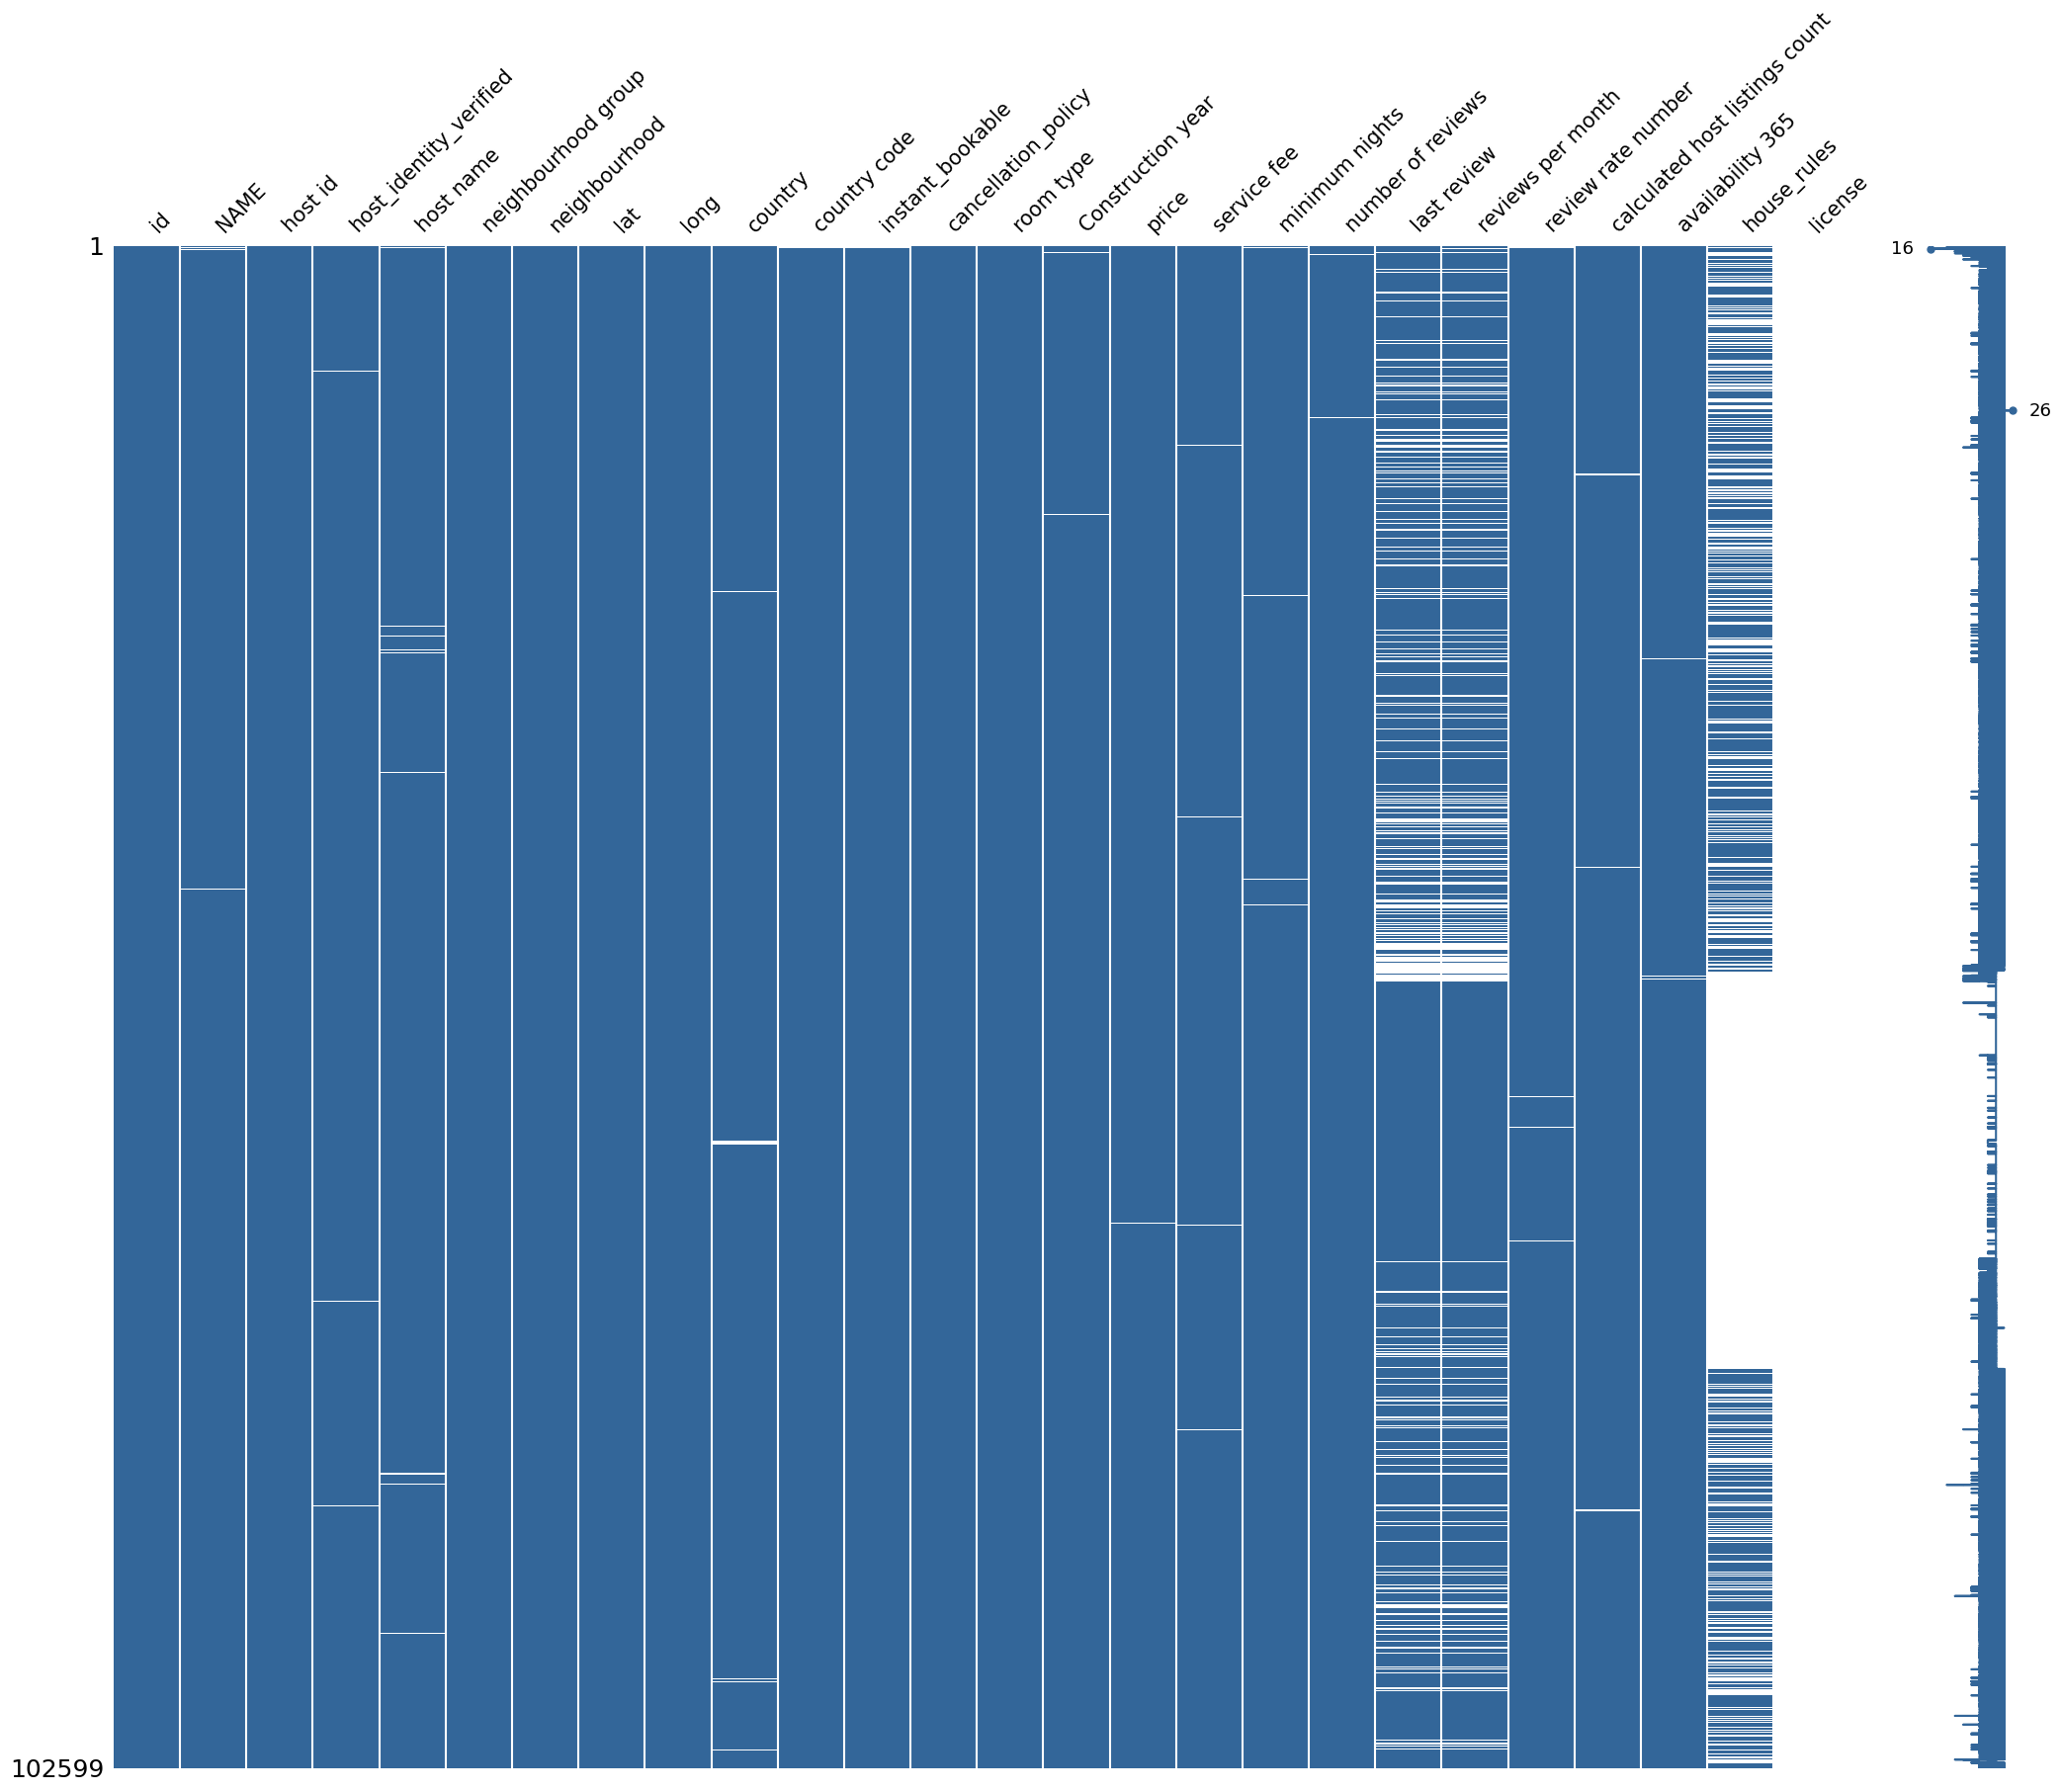

In [4]:
matrix_kws = {
    'figsize': (25, 20),     # Size of the matrix
    'fontsize': 15,         # Font size
    'color': (0.2, 0.4, 0.6) # Color palette (adjust as desired)
}
msno.matrix(df,**matrix_kws)


**The licensce column clearly has so many rows missing hence it would be good idea to discard this column. Additionally, house_rules has null values in most rows.**

## Dropping columns : license and house rules

In [5]:
df.drop(['license','house_rules'],axis=1,inplace=True)
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

## Dropping rows with missing values

In [6]:
# df.dropna(subset=['reviews per month', 'last review'], inplace=True)
df.dropna(inplace=True)

## Verifying for dropping rows

<AxesSubplot:>

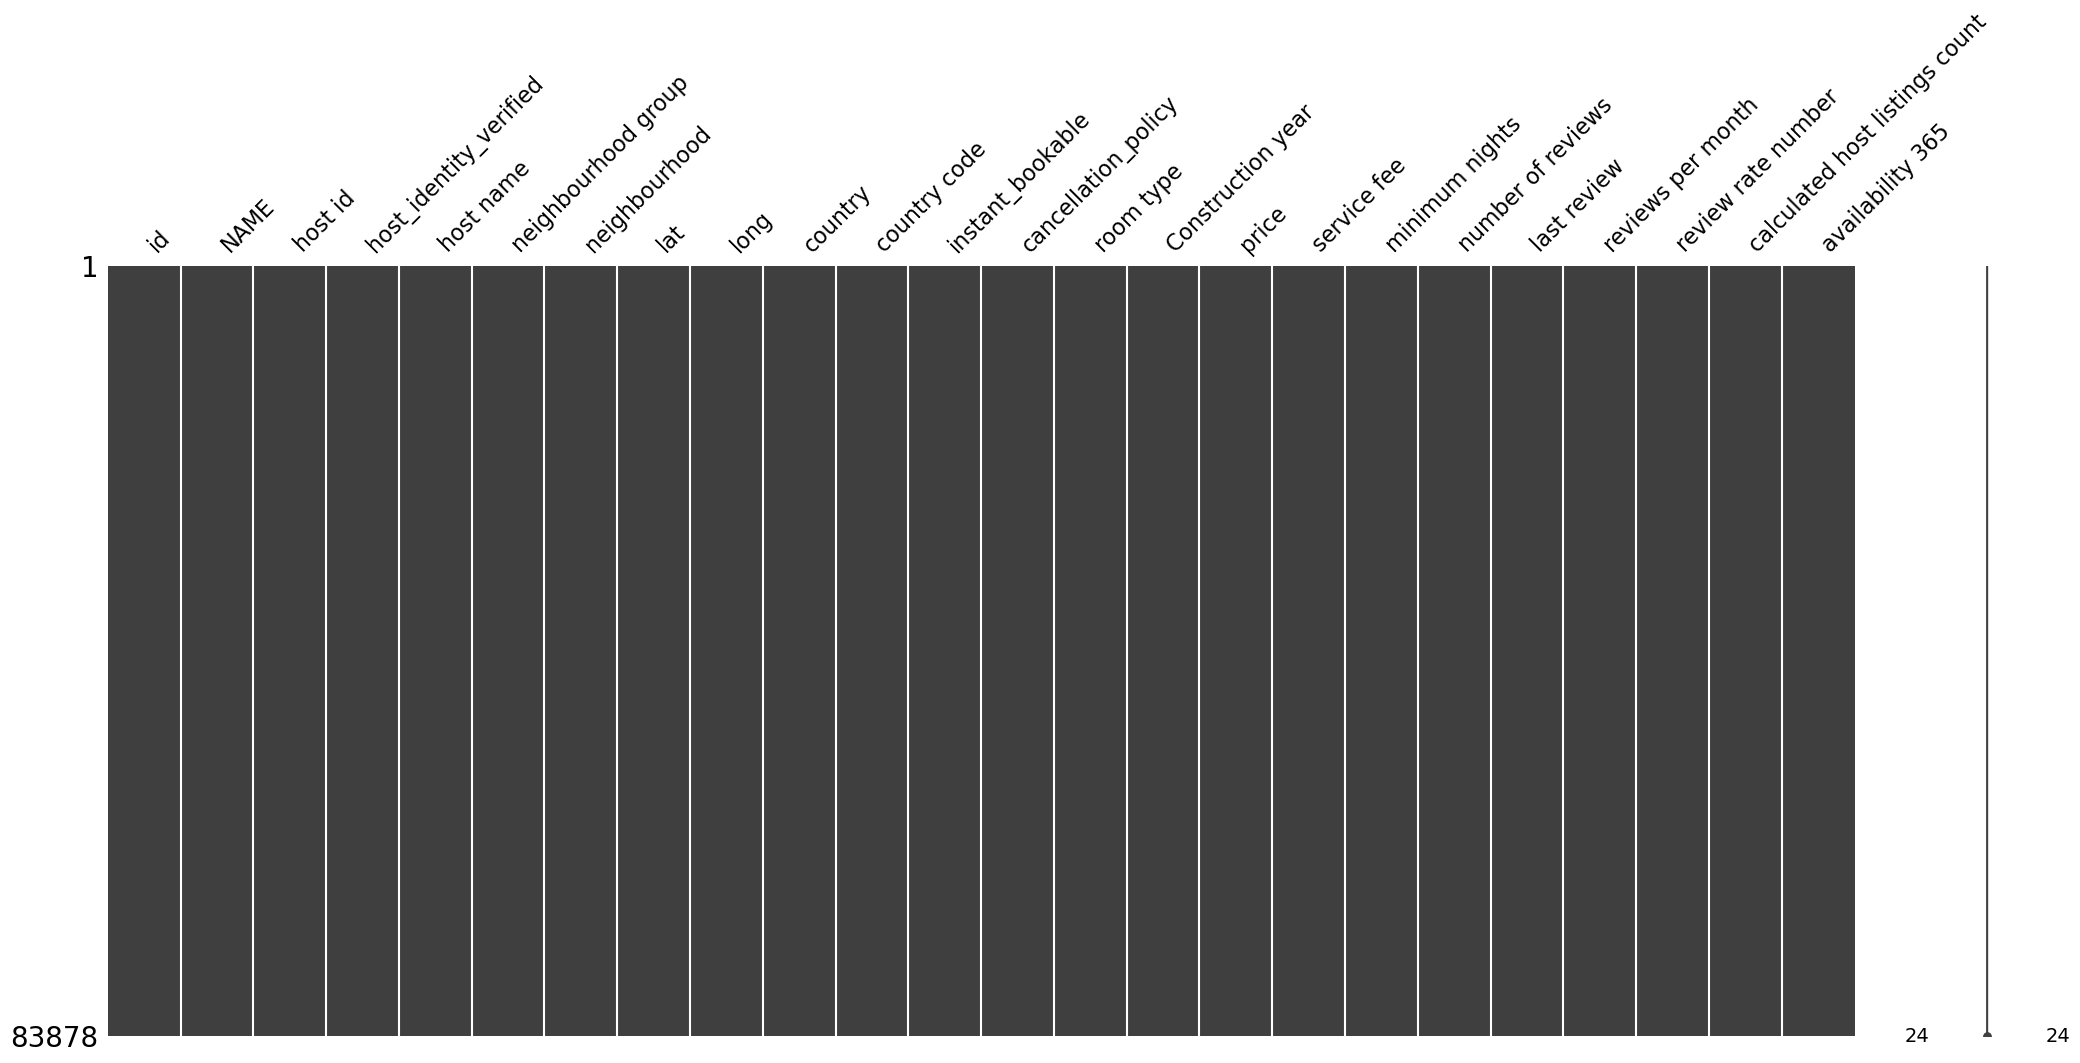

In [7]:
msno.matrix(df)

## Re-Structuring of Price & Service Fee

In [8]:
# To convert, the object can not have any non-numerical character such as , white space ' ', or '$'

def data_syntax_util(columnName): 
    price_column=df[columnName].astype(str).to_numpy()
    number=""
    temp_list=[]
    for price_string in price_column:
        price_string[1:] # Removing '$' from the price
        for i in range(len(price_string)):
            if price_string[i].isnumeric():
                number+=price_string[i]
        number=number.strip() # Striping any leading white space
        number=number.lstrip()
        number=number.replace(',','')  # Removing any comma within the number
        temp_list.append(number)
        number=""
#         temp_list.append(t) #collecting the cleaned number into temp_list list
    return temp_list

new_price_list=data_syntax_util('price')
print(len(new_price_list))

83878


In [9]:
def column_util(new_list,newColumnName):
    global df
    df = df.reset_index(drop=True)  # Reset the index to avoid any issues with duplicates

    df[newColumnName] = new_list # adding the list to the dataframe
    
    
column_util(new_price_list,'price')
df.replace('',0,inplace=True)
# df[df.Price.index==147]
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
3,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,1060,$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0


In [27]:
new_service_list=data_syntax_util('service fee')
df['service fee']=new_service_list
df[['service fee']].head()

,service fee
0,193
1,28
2,41
3,115
4,212


**The job is done perfectly,as it is evidenced in the above table.The price and service fee columns are ready for data type conversion**

## DataType Conversion

In [28]:
dataType_change=['Construction year','service fee','price','minimum nights','number of reviews','reviews per month','review rate number','availability 365']
def change_dataType():
    for i in range(8):
        try:
            df[dataType_change[i]]=df[dataType_change[i]].astype(int)
            print("The column",dataType_change[i],"data type was updated")
        except:
            print("The following column need processing before data type can changed",dataType_change[i])
        
change_dataType()
df['last review']=pd.to_datetime(df['last review'])
df.info()

# df['minimum nights']=df['minimum nights'].astype(int)
# df['minimum nights'].info()

The column Construction year data type was updated
The column service fee data type was updated
The column price data type was updated
The column minimum nights data type was updated
The column number of reviews data type was updated
The column reviews per month data type was updated
The column review rate number data type was updated
The column availability 365 data type was updated
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83878 entries, 0 to 83877
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83878 non-null  int64         
 1   NAME                            83878 non-null  object        
 2   host id                         83878 non-null  int64         
 3   host_identity_verified          83878 non-null  object        
 4   host name                       83878 non-null  object        
 5   neighbourhood group    

**As it is evidence from the above table, all the attributes hold appropriate data type at this point.**

## Getting Statistical Description

In [29]:
df[['Construction year','Construction year','minimum nights','number of reviews','reviews per month','review rate number','calculated host listings count','availability 365']].describe() # you can use “include=[X]” and “exclude=[X]” which will limit the results to specific data types

,Construction year,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,83878.000000,83878.000000,83878.000000,83878.000000,83878.000000,83878.00000,83878.000000,83878.000000
mean,2012.487446,2012.487446,7.417261,32.227044,1.000930,3.27943,7.030044,141.861990
std,5.760245,5.760245,28.041322,51.888326,1.697099,1.28311,29.501556,133.944313
min,2003.000000,2003.000000,-365.000000,1.000000,0.000000,1.00000,1.000000,-10.000000
25%,2007.000000,2007.000000,2.000000,3.000000,0.000000,2.00000,1.000000,6.000000
50%,2012.000000,2012.000000,3.000000,11.000000,0.000000,3.00000,1.000000,101.000000
75%,2017.000000,2017.000000,5.000000,38.000000,2.000000,4.00000,2.000000,266.000000
max,2022.000000,2022.000000,5645.000000,1024.000000,90.000000,5.00000,332.000000,3677.000000
